<a href="https://colab.research.google.com/github/sgr1118/EX/blob/main/%5BExp_07%5D_Camera_Sticker_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-6. 프로젝트: 고양이 수염 스티커 만들기

In [ ]:
# 필요한 라이브러리 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

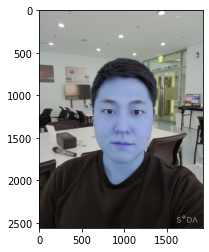

In [ ]:
# 이미지 불러오기

my_image_path = '/content/drive/MyDrive/Aiffel/EX/camera image/my face.jpg'
img_bgr = cv2.imread(my_image_path) # opencv로 이미지 불러오기
img_show = img_bgr.copy()
plt.imshow(img_bgr)
#plt.show()

# 색감이 파랗게 출력
# opencv는 BGR (파랑, 녹색, 삘강)을 사용하기때문에 이렇게 사진이 출력

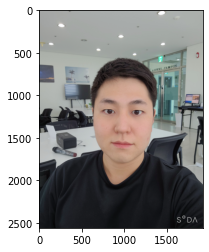

In [ ]:
# RGB로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
#plt.show()

rectangles[[(603, 958) (1401, 1757)]]


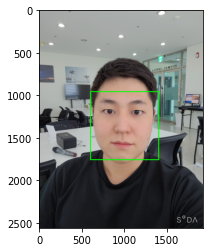

In [ ]:
# 얼굴 검출 face detection

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트

print(dlib_rects)

for dlib_rect in dlib_rects:
  L = dlib_rect.left()
  T = dlib_rect.top()
  R = dlib_rect.right()
  B = dlib_rect.bottom()

  cv2.rectangle(img_show, (L, T), (R, B), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다. 
# dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.

# 얼굴 랜드마크 face landmark

### face landmark란?
### 이목구비의 위치를 추론하는 기술을 말한다.
### face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용

### Object keypoint estimation 알고리즘?
### Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다
### keypoint를 찾는 2가지 방법
### (1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측
### (2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

68


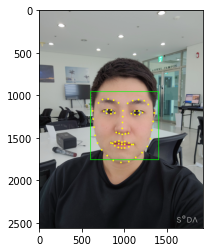

In [ ]:
# 랜드마크 검출

# Dlib landmark localization

model_path = '/content/drive/MyDrive/Aiffel/EX/camera image/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다

for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)
  # face landmark 좌표를 저장해둡니다
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. 
# 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
# list_points 는 tuple (x, y) 68개로 이루어진 리스트

# 랜드마크를 영상에 출력
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show, point, 10, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

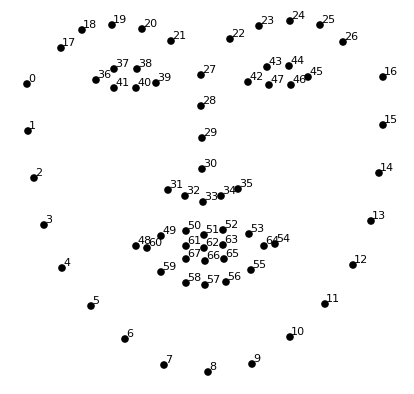

- 이미지 삽입 참고용

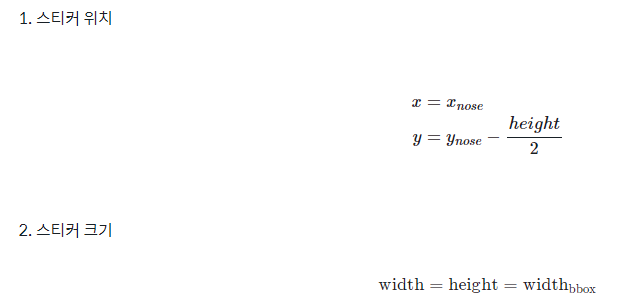

- 위치 계산

In [ ]:
# 스티커 적용

# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  print(landmark[8]) # 턱의 index는 8
  x = landmark[8][0]
  y = landmark[8][1] #- dlib_rect.height() // 2
  w = h = dlib_rect.width()
  print ('(x,y) : (%d,%d)'%(x,y))
  print ('(w,h) : (%d,%d)'%(w,h))

(959, 1789)
(x,y) : (959,1789)
(w,h) : (799,799)


In [ ]:
# 스티커 불러오기

sticker_path = '/content/drive/MyDrive/Aiffel/EX/camera image/moustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(799, 799, 3)


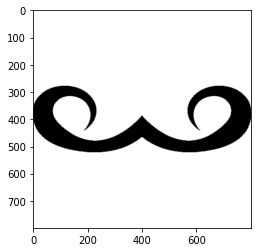

In [ ]:
plt.imshow(img_sticker)
plt.show()

In [ ]:
# x, y 좌표 조정, 이미지 시작점은 top-left 좌표

refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (560,990)


In [ ]:
# 원본 이미지의 범위를 벗어난 스티커 부분을 제거

if refined_x < 0:
  img_sticker = img_sticker[:, -refined_x:]
  refined_x = 0

if refined_y < 0:
  img_sticker = img_sticker[-refined_y:,:]
  refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (560,990)


In [ ]:
# 원본 이미지에 스티커 적용 - 1
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker >= 255,sticker_area,img_sticker).astype(np.uint8)

In [ ]:
# 원본 이미지에 스티커 적용 - 2
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker > 0,sticker_area,img_sticker).astype(np.uint8)

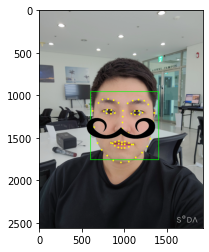

In [ ]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

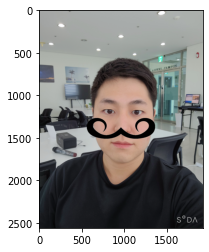

In [ ]:
# bounding box와 landmark를 제거하고 최종 결과만 출력

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker >= 255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 180도 뒤집은 사진으로 스티커 붙여보기

- 사진을 뒤집은 경우 문제가 발생하는지 알아보고 해결법 찾기

In [1]:
# 필요한 라이브러리 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

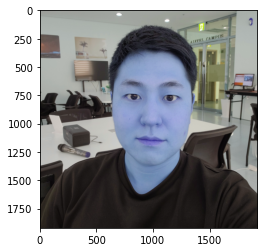

In [5]:
# 이미지 불러오기

my_image_path = '/content/drive/MyDrive/Aiffel/EX/EX8_image/my_face.jpg'
img_bgr = cv2.imread(my_image_path) # opencv로 이미지 불러오기
img_show = img_bgr.copy()
plt.imshow(img_bgr)
#plt.show()

# 색감이 파랗게 출력
# opencv는 BGR (파랑, 녹색, 삘강)을 사용하기때문에 이렇게 사진이 출력

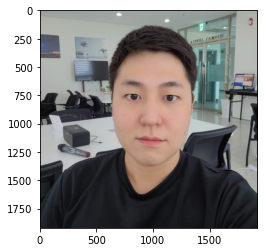

In [6]:
# RGB로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
#plt.show()

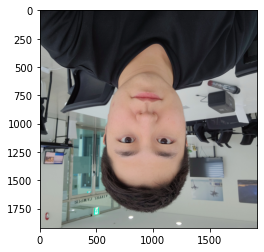

In [7]:
# 이미지 회전 시키기(180도) - 첫번째 방법
#img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
img180 = cv2.rotate(img_rgb, cv2.ROTATE_180) # 180도 회전
#img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(img180)

(960.0, 960.0)


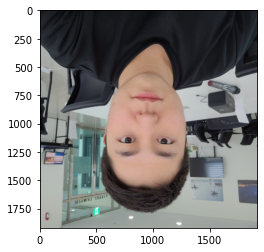

In [13]:
# 이미지 회전 시키기(180도) - 두번째 방법
width, height = img_rgb.shape[:2]
cp = (img_rgb.shape[1] / 2, img_rgb.shape[0] / 2) # (960.0, 960.0)
print(cp)

img_180 = cv2.getRotationMatrix2D(cp, 180, 1)
img_180_cp = cv2.warpAffine(img_rgb,img_180,(width,height))
plt.imshow(img_180_cp)


In [8]:
# 이미지 shape 확인
# 좌표 계산을 위해 확인
img180.shape # (2560, 1920, 3)

(1920, 1920, 3)

# 정상적인 이미지를 사용할 때와는 다르게 얼굴 검출이 제대로 실행되지 않는다.

- 일반적인 사진과 다르게 좌표를 찾을 수 없는 것으로 보인다.
- 해결 방법 : 직접 좌표를 계산하여 그려보자
- 위에서 이미지 shpae를 확인한 후 좌표를 계산하여 사각형을 그릴수있었다.

rectangles[]
<Face detection bounding box>


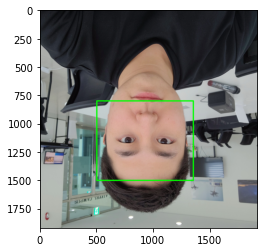

In [12]:
# 얼굴 검출 face detection

detector_hog = dlib.get_frontal_face_detector()

# img_rgb = cv2.cvtColor(img_180_cp, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img180, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트

print(dlib_rects)

for dlib_rect in dlib_rects:
  L = dlib_rect.left()
  T = dlib_rect.top()
  R = dlib_rect.right()
  B = dlib_rect.bottom()

  #cv2.rectangle(img_180_cp, (L, T), (R, B), (0,255,0), 10, lineType=cv2.LINE_AA)
face_rectangle = cv2.rectangle(img180, (500, 800), (1350, 1500), (0,255,0), 10, lineType=cv2.LINE_AA)
print("<Face detection bounding box>")
plt.imshow(img180)
plt.show()

# 뒤집은 사진에서는 랜드마크 검출도 쉽게 되지않았다.


In [ ]:
# 랜드마크 검출

# Dlib landmark localization

model_path = '/content/drive/MyDrive/Aiffel/EX/camera image/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다

for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)
  # face landmark 좌표를 저장해둡니다
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  list_landmarks.append(list_points)

print(len(list_landmarks[0]))

NameError: ignored

# 정중앙이 아닌 약간 옆으로 치우친 사진으로 스티커 붙여보기

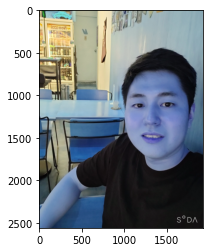

In [ ]:
# 이미지 불러오기

my_image_path = '/content/drive/MyDrive/Aiffel/EX/camera image/face.jpg'
img_bgr = cv2.imread(my_image_path) # opencv로 이미지 불러오기
img_show = img_bgr.copy()
plt.imshow(img_bgr)
#plt.show()

# 색감이 파랗게 출력
# opencv는 BGR (파랑, 녹색, 삘강)을 사용하기때문에 이렇게 사진이 출력

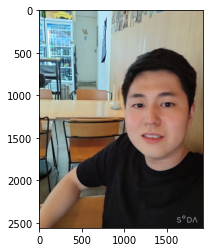

In [ ]:
# RGB로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
#plt.show()

# 옆으로 치우쳤다해도 정면이라면 문제없이 인식을 하는 것을 볼 수 있다.

rectangles[[(958, 869) (1756, 1668)]]


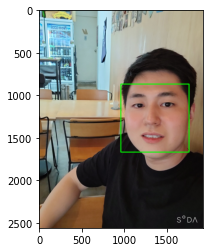

In [ ]:
# 얼굴 검출 face detection

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트

print(dlib_rects)

for dlib_rect in dlib_rects:
  L = dlib_rect.left()
  T = dlib_rect.top()
  R = dlib_rect.right()
  B = dlib_rect.bottom()

  cv2.rectangle(img_show, (L, T), (R, B), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다. 
# dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.

68


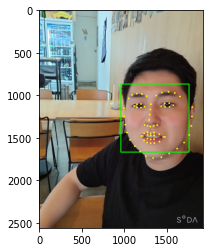

In [ ]:
# 랜드마크 검출

# Dlib landmark localization

model_path = '/content/drive/MyDrive/Aiffel/EX/camera image/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다

for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)
  # face landmark 좌표를 저장해둡니다
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. 
# 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
# list_points 는 tuple (x, y) 68개로 이루어진 리스트

# 랜드마크를 영상에 출력
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show, point, 10, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

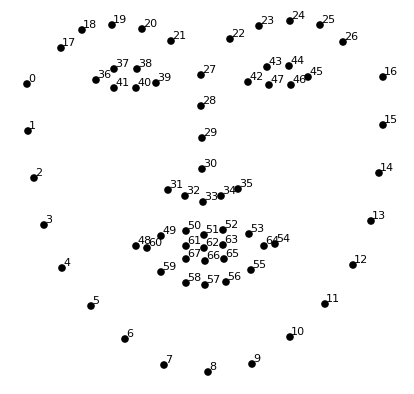

- 이미지 삽입 참고용

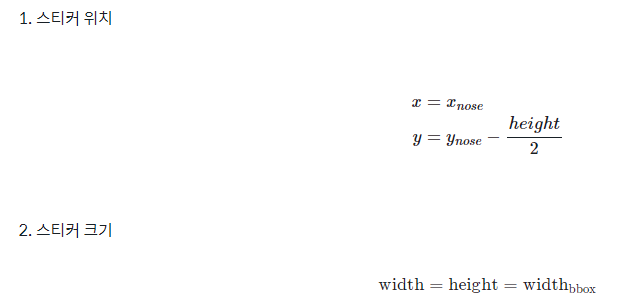

- 위치 계산

In [ ]:
# 스티커 적용

# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  print(landmark[8]) # 턱의 index는 8
  x = landmark[8][0]
  y = landmark[8][1] #- dlib_rect.height() // 2
  w = h = dlib_rect.width()
  print ('(x,y) : (%d,%d)'%(x,y))
  print ('(w,h) : (%d,%d)'%(w,h))

(1335, 1738)
(x,y) : (1335,1738)
(w,h) : (799,799)


In [ ]:
# 스티커 불러오기

sticker_path = '/content/drive/MyDrive/Aiffel/EX/camera image/moustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(799, 799, 3)


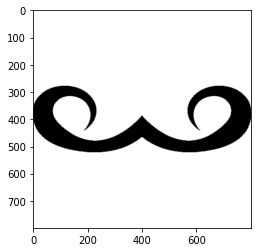

In [ ]:
plt.imshow(img_sticker)
plt.show()

In [ ]:
# x, y 좌표 조정, 이미지 시작점은 top-left 좌표

refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (936,939)


In [ ]:
# 원본 이미지의 범위를 벗어난 스티커 부분을 제거

if refined_x < 0:
  img_sticker = img_sticker[:, -refined_x:]
  refined_x = 0

if refined_y < 0:
  img_sticker = img_sticker[-refined_y:,:]
  refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (936,939)


In [ ]:
# 원본 이미지에 스티커 적용 - 1
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker >= 255,sticker_area,img_sticker).astype(np.uint8)

# np.where에서 콧수염의 검은 이미지만 추출하기위하여 배열에서 값이 255 이상인 경우로 지정

In [ ]:
# 원본 이미지에 스티커 적용 - 2
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker > 0,sticker_area,img_sticker).astype(np.uint8)
# np.where에서 콧수염의 검은 이미지만 추출하기위하여 배열에서 값이 0 초과한 경우로 지정

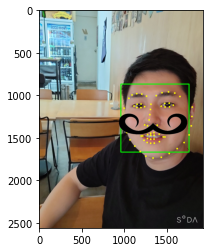

In [ ]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

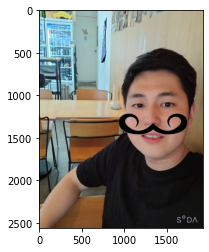

In [ ]:
# bounding box와 landmark를 제거하고 최종 결과만 출력

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker >= 255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

1. 이번 프로젝트에서 어려웠던 점
 
 (1) 사진에서 제 얼굴의 각도가 달리질때는 dlib_rects이 인식을 할 수 없어 직접 좌표를 찍어 계산해보았지만 랜드 마크 추출을 할 수 없었습니다. google search를 통하여 해결하려했으나 뒤집은 사진을 사용한 예시는 찾을 수 없었습니다.
 

2. 프로젝트를 진행하면서 알게된 부분 또는 아직 이해하지 못한 부분

(1) 뒤집은 사진은 어떻게해야 인식을 할 수 있을까?

- HOG와 SVM의 지식이 부족해서 뒤집은 사진은 어떻게 추출할 수 있을지 학습이 더 필요할 거 같습니다.




참조

(1) [사진에 사격형 그리기 예시](https://bskyvision.com/entry/python-%EC%B1%84%EC%9B%8C%EC%A7%84-%EC%82%AC%EA%B0%81%ED%98%95-%EA%B7%B8%EB%A6%AC%EB%8A%94-%EB%B0%A9%EB%B2%95-cv2rectangle-%ED%95%A8%EC%88%98-%ED%99%9C%EC%9A%A9)

(2) [cv2.rotate 참고](https://kimtaeuk0103.tistory.com/37)


